# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
# Cargar todas las librerías



## Cargar datos

In [2]:
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

# Carga los archivos de datos en diferentes DataFrames



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
plans.info()
plans.describe()

# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Podemos obversarvar que la cantidad de internet inlcuida por mes se encuentra expresada en mb pero la tarifa extra se encuentra expresado en gb, necesitamos crear una columna que convierta los mb a gb para que sea mas intuitiva la lectura de los datos.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# No se encuentraron problemas obvios en el DataFrame

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#Crear nueva columna con los datos de GB incluidos por mes
plans['gb_per_month_included'] = (plans['mb_per_month_included']/1024).astype(int)

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# Imprime una muestra de datos para usuarios
display(users.head())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Se observa que los tipos de datos no son lo adecuados para las fechas, tambien que esxisten datos vacios en la fecha de cancelación, lo que puede significar que el plan aun se encuentra activo, se pudiera agregar una columna informativa si el plan sigue activo.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
users['user_status'] = np.where(users['churn_date'].isnull(), 'active', 'churned')

display(users.sample(5))
users.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,user_status
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,NaT,active
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,active
199,1199,Antonetta,Finley,39,"San Antonio-New Braunfels, TX MSA",2018-08-01,ultimate,NaT,active
253,1253,Sumiko,Dudley,28,"Cleveland-Elyria, OH MSA",2018-08-18,ultimate,NaT,active
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaT,active


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   user_status  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [12]:
# Imprime una muestra de datos para las llamadas
display(calls.head())
display(calls.sample(5))
display(calls)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,call_date,duration
75948,1268_452,1268,2018-08-07,6.53
128200,1460_253,1460,2018-09-09,0.00
106519,1377_71,1377,2018-08-21,14.87
51336,1185_374,1185,2018-06-14,0.49
133701,1483_574,1483,2018-10-29,13.09


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Se observa que el tipo de datos no es el adecuados para las fechas, tambien que hay llamadas que tienen una duración de 0 minutos

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
calls['call_status'] = np.where(calls['duration']==0, 'unanswered', 'answered')
calls['duration'] = np.ceil(calls['duration'])

display(calls.sample(5))
calls.info()

,id,user_id,call_date,duration,call_status
40668,1150_312,1150,2018-11-30,5.0,answered
59283,1214_352,1214,2018-10-08,5.0,answered
130321,1468_68,1468,2018-12-16,5.0,answered
11654,1050_429,1050,2018-07-15,0.0,unanswered
114884,1402_130,1402,2018-12-11,2.0,answered


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           137735 non-null  object        
 1   user_id      137735 non-null  int64         
 2   call_date    137735 non-null  datetime64[ns]
 3   duration     137735 non-null  float64       
 4   call_status  137735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
display(messages.sample(5))
display(messages.head())


,id,user_id,message_date
20818,1131_157,1131,2018-11-13
3525,1036_360,1036,2018-11-17
14107,1098_107,1098,2018-12-30
49540,1328_498,1328,2018-07-27
75563,1491_465,1491,2018-06-04


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Las fechas no se encuentran con el formato correcto, tenemos que pasarla a Datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [19]:
# Imprime una muestra de datos para el tráfico de internet
display(internet.head())
display(internet.sample(5))


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,session_date,mb_used
34188,1155_232,1155,2018-03-15,212.29
103579,1495_198,1495,2018-12-06,258.03
33946,1154_106,1154,2018-10-11,822.29
78817,1367_466,1367,2018-11-14,0.00
21900,1100_104,1100,2018-09-14,55.89


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Las fechas no se encuentran con el formato correcto, tenemos que pasarla a Datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
internet['gb_used']=(internet['mb_used']/1024).astype(float)
internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans)



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.month
calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')
display(calls_per_month)

,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls.groupby(['user_id','month'])['duration'].sum().reset_index(name ='sum_minutes')
display(minutes_per_month)


,user_id,month,sum_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id','month']).size().reset_index(name = 'messages_count')
display(messages_per_month)

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month
internet_per_month = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index(name = 'gb_sum')
internet_per_month['gb_sum'] = np.ceil(internet_per_month['gb_sum'])
display(internet_per_month)

,user_id,month,gb_sum
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_consumption = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')\
                 .merge(messages_per_month, on=['user_id', 'month'], how='outer')\
                 .merge(internet_per_month, on=['user_id', 'month'], how='outer')

# Rellenar valores ausentes con "0"
monthly_consumption = monthly_consumption.fillna(0)

# Ordenar por usuario
monthly_consumption = monthly_consumption.sort_values(by = ['user_id','month'])

display(monthly_consumption)




,user_id,month,call_count,sum_minutes,messages_count,gb_sum
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2253,1498,12,39.0,339.0,0.0,23.0
2254,1499,9,41.0,346.0,0.0,13.0
2255,1499,10,53.0,385.0,0.0,20.0
2256,1499,11,45.0,308.0,0.0,17.0


In [28]:
# Añade la información de la tarifa
monthly_consumption_plan = monthly_consumption.merge(users, on='user_id', how = 'left')
display(monthly_consumption_plan)

,user_id,month,call_count,sum_minutes,messages_count,gb_sum,first_name,last_name,age,city,reg_date,plan,churn_date,user_status
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,active
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,active
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,active
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,active
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,active
2289,1499,9,41.0,346.0,0.0,13.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,active
2290,1499,10,53.0,385.0,0.0,20.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,active
2291,1499,11,45.0,308.0,0.0,17.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,active


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [29]:
# Calcula el ingreso mensual para cada usuario

# Unir DataFrames
revenue = monthly_consumption_plan.merge(plans, left_on = 'plan', right_on = 'plan_name', how = 'left') 

# Calcular el excedente de los planes
revenue['extra_call'] = revenue['sum_minutes']-revenue['minutes_included']
revenue['extra_call'] = revenue['extra_call'].apply(lambda x: max(x,0)) 

revenue['extra_messages'] = revenue['messages_count']-revenue['messages_included']
revenue['extra_messages'] = revenue['extra_messages'].apply(lambda x: max(x,0))

revenue['extra_gb'] = revenue['gb_sum']-revenue['gb_per_month_included']
revenue['extra_gb'] = revenue['extra_gb'].apply(lambda x: max(x,0))

# Calcular cargos adicionales

revenue['extra_call_charges'] = revenue['extra_call'] * revenue['usd_per_minute']
revenue['extra_messages_charges'] = revenue['extra_messages'] * revenue['usd_per_message']
revenue['extra_gb_charges'] = revenue['extra_gb'] * revenue['usd_per_gb']


# Calcular los ingresos totales

revenue['total_revenue'] = (revenue['extra_call_charges'] + revenue['extra_messages_charges']\
                            + revenue['extra_gb_charges'] + revenue['usd_monthly_pay'])

revenue_per_month = revenue[['user_id','month','total_revenue','plan_name']]

display(revenue_per_month)




,user_id,month,total_revenue,plan_name
0,1000,12,70.00,ultimate
1,1001,8,20.00,surf
2,1001,9,20.00,surf
3,1001,10,90.09,surf
4,1001,11,60.00,surf
...,...,...,...,...
2288,1498,12,100.00,surf
2289,1499,9,20.00,surf
2290,1499,10,70.00,surf
2291,1499,11,40.00,surf


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

plan,surf,ultimate
month,,
1,6.766667,6.910714
2,7.303279,6.916667
3,7.106742,6.614130
4,7.191899,7.088176
5,7.173700,7.054491
6,7.251863,7.110522
7,7.124836,7.276061
8,7.124718,7.015709
9,7.128537,7.166857


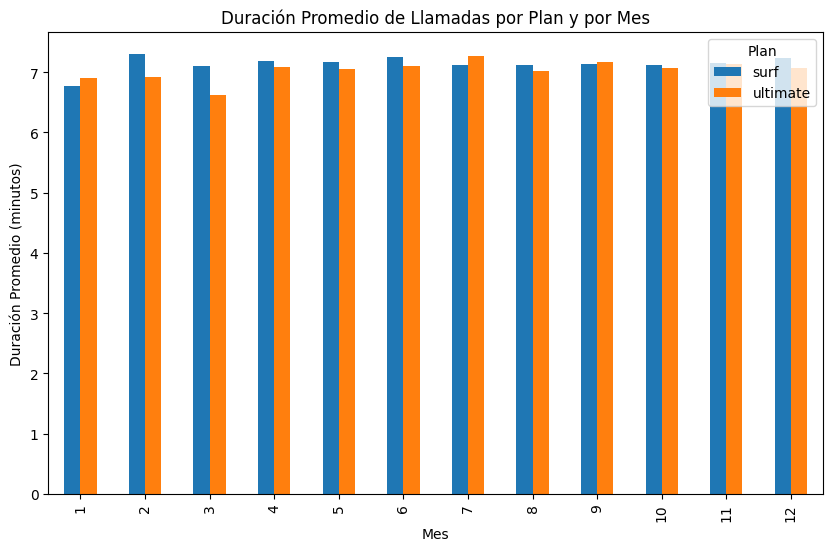

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

pivot_sum_minutes = revenue.pivot_table(index=['month'], columns='plan', values='sum_minutes')
pivot_num_calls = revenue.pivot_table(index=['month'], columns='plan', values='call_count')

average_minutes_per_call = pivot_sum_minutes / pivot_num_calls

display(average_minutes_per_call)

average_minutes_per_call.plot( kind = 'bar', figsize = (10,6))

plt.title('Duración Promedio de Llamadas por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.legend(title='Plan')

plan            surf  ultimate
user_id month                 
1000    12       NaN     124.0
1001    8      182.0       NaN
        9      315.0       NaN
        10     393.0       NaN
        11     426.0       NaN
...              ...       ...
1498    12     339.0       NaN
1499    9      346.0       NaN
        10     385.0       NaN
        11     308.0       NaN
        12     496.0       NaN

[2293 rows x 2 columns]

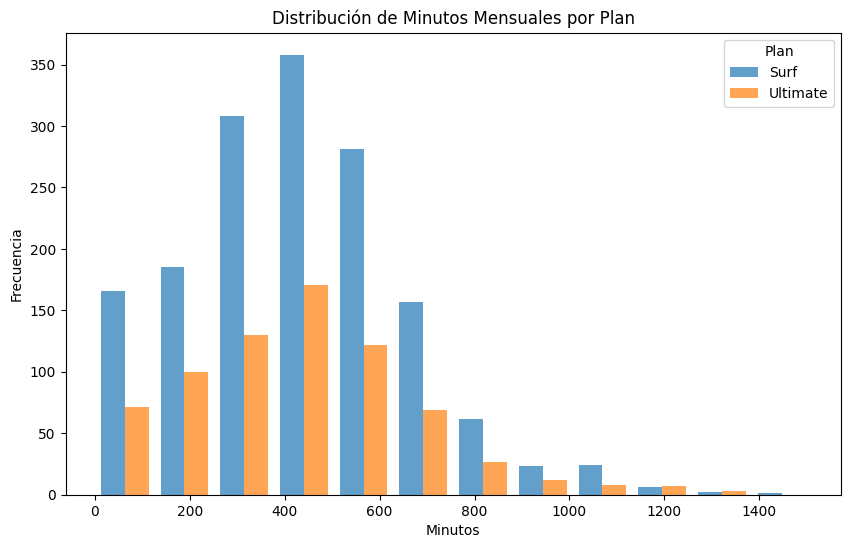

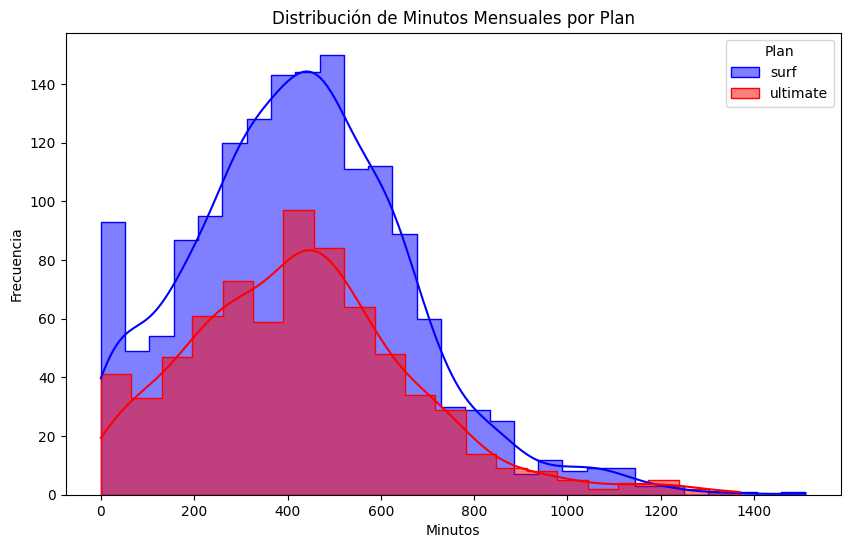

In [31]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

pivot_calls = revenue.pivot_table(index=['user_id','month'], columns='plan', values='sum_minutes')
display(pivot_calls)

# Gráfico Matplotlib
plt.figure(figsize=(10, 6))
plt.hist([pivot_calls['surf'], pivot_calls['ultimate']], bins=12, label=['Surf', 'Ultimate'], alpha=0.7)

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

# Grafico con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=pivot_calls, x='surf', element='step', kde=True, color='blue', label='surf')
sns.histplot(data=pivot_calls, x='ultimate', element ='step', kde=True, color='red', label='ultimate')

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_calls = pivot_calls.mean()
var_calls = pivot_calls.var()
display(mean_calls)
display(var_calls)

plan
surf        428.749523
ultimate    430.450000
dtype: float64

plan
surf        54968.279461
ultimate    57844.464812
dtype: float64

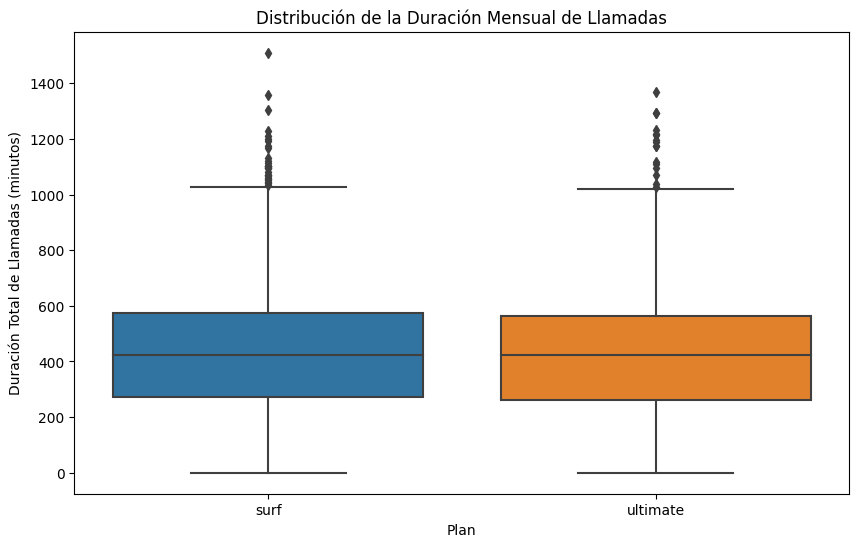

In [33]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
sns.boxplot(data=pivot_calls)
plt.title('Distribución de la Duración Mensual de Llamadas')
plt.xlabel('Plan')
plt.ylabel('Duración Total de Llamadas (minutos)')
plt.show()




[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


* Observamos que los minutos promedio por llamada se mantienen constatentes a lo largo del año, se mantienen en rango entre 6.5 y 7.5 minutos para los dos planes.

* El rango de minutos mensuales que consumen los usuarios se encuentra en un rango 200 y 600. Este número se encuentra muy cercano al limite del plan Surf, lo que significa que gran parte de ellos estan exediendo sus limites y pagando un sobre precio, por el contrario a la gran mayoria de los usuarios Ultimate les estan sobrando muchos minutos.

* De acuerdo a las comparaciones realizadas mediante los graficos,  el comportamiento de los usuarios con respecto a las llamadas parece comportarse de una manera muy similar en los dos tipos de planes.


### Mensajes

plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


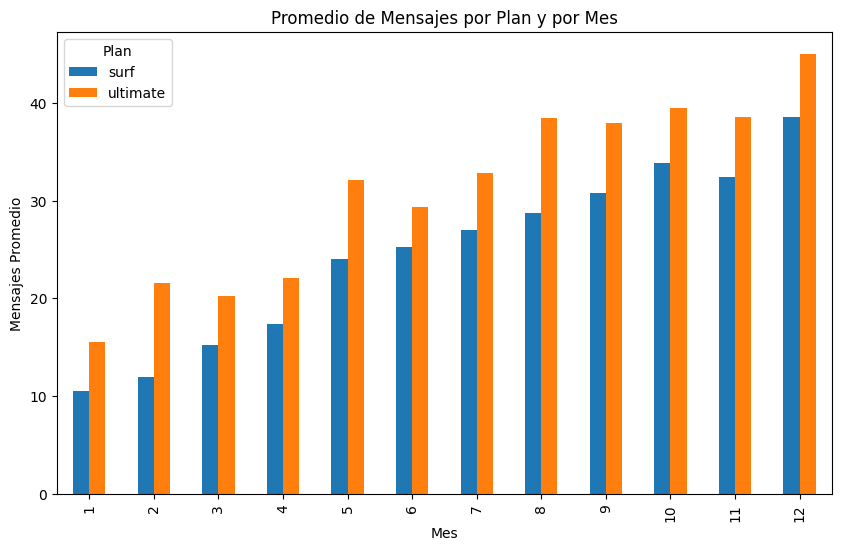

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
pivot_messages = revenue.pivot_table(index='month', columns='plan', values='messages_count')
display(pivot_messages)

pivot_messages.plot( kind = 'bar', figsize = (10,6))

plt.title('Promedio de Mensajes por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes Promedio')
plt.legend(title='Plan')

plan           surf  ultimate
user_id month                
1000    12      NaN      11.0
1001    8      30.0       NaN
        9      44.0       NaN
        10     53.0       NaN
        11     36.0       NaN
...             ...       ...
1498    12      0.0       NaN
1499    9       0.0       NaN
        10      0.0       NaN
        11      0.0       NaN
        12      0.0       NaN

[2293 rows x 2 columns]

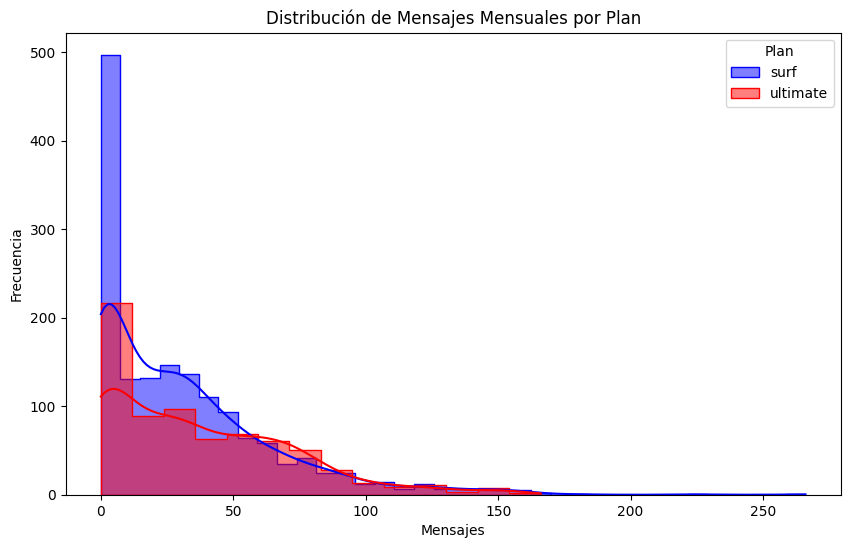

In [35]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

pivot_messages = revenue.pivot_table(index=['user_id','month'], columns='plan', values='messages_count', aggfunc='sum')
display(pivot_messages)

# Grafico con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=pivot_messages, x='surf', element='step', kde=True, color='blue', label='surf')
sns.histplot(data=pivot_messages, x='ultimate', element ='step', kde=True, color='red', label='ultimate')

plt.title('Distribución de Mensajes Mensuales por Plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()



In [36]:
# Calcula la media y la varianza de la distribución de mensajes mensuales por plan

mean_messages = pivot_messages.mean()
var_messages = pivot_messages.var()
display(mean_messages)
display(var_messages)

plan
surf        31.159568
ultimate    37.551389
dtype: float64

plan
surf        1126.724522
ultimate    1208.756744
dtype: float64

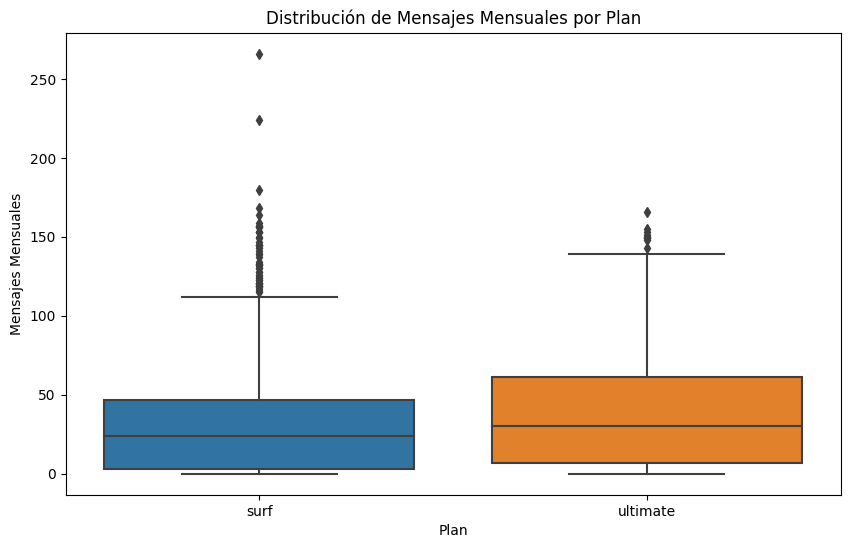

In [37]:
# Traza un diagrama de caja para visualizar la distribución de mensajes mensuales por plan

plt.figure(figsize=(10, 6))
sns.boxplot(data=pivot_messages)
plt.title('Distribución de Mensajes Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes Mensuales')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

* De acuerdo a las comparaciones realizadas mediante los graficos:
* 1. Podemos observar que los usuarios se comportan relativamente de manera similar, ya que la mayoria no sobrepasa los 100 mensajes independientemente del plan que manejen.
* 2. La mayoria de los usuarios de Surf mandan entre 0 y 50 mensajes al mes, pero hay más usuarios que llegan sobrepasar esos limites lo que ocaciona que este pagando un sobreprecio muy alto.
* 3. Los mesajes tienden ir en aumento a lo largo del año.


### Internet

plan,surf,ultimate
month,,
1,5.000000,7.250000
2,12.222222,17.285714
3,13.565217,18.416667
4,12.220000,16.333333
5,14.116883,16.862069
6,15.484536,15.425532
7,16.876033,16.491525
8,16.882716,17.845070
9,16.690722,17.011628


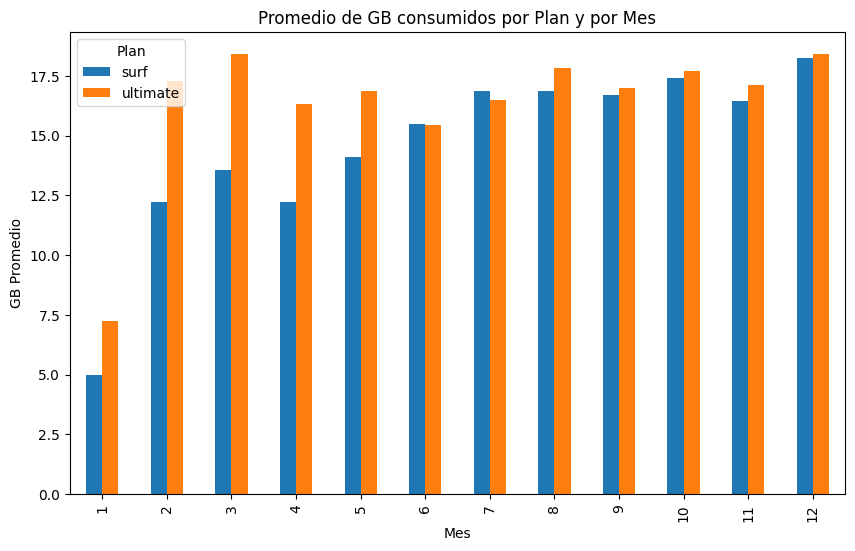

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
pivot_internet = revenue.pivot_table(index='month', columns='plan', values='gb_sum')
display(pivot_internet)

pivot_internet.plot( kind = 'bar', figsize = (10,6))

plt.title('Promedio de GB consumidos por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('GB Promedio')
plt.legend(title='Plan')

plan           surf  ultimate
user_id month                
1000    12      NaN       2.0
1001    8       7.0       NaN
        9      14.0       NaN
        10     22.0       NaN
        11     19.0       NaN
...             ...       ...
1498    12     23.0       NaN
1499    9      13.0       NaN
        10     20.0       NaN
        11     17.0       NaN
        12     22.0       NaN

[2293 rows x 2 columns]

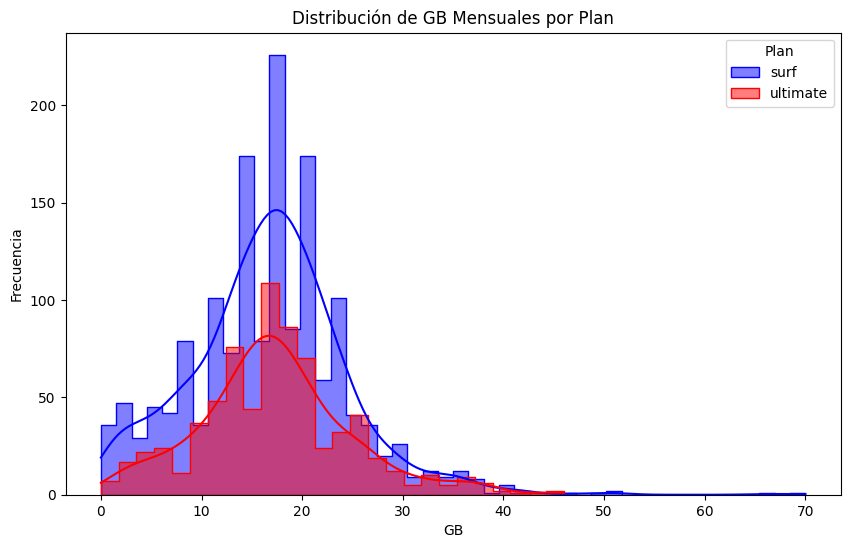

In [39]:
# Compara el número de GB mensuales que necesitan los usuarios de cada plan. Traza un histograma.

pivot_internet = revenue.pivot_table(index=['user_id','month'], columns='plan', values='gb_sum', aggfunc='sum')
display(pivot_internet)

# Grafico con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=pivot_internet, x='surf', element='step', kde=True, color='blue', label='surf')
sns.histplot(data=pivot_internet, x='ultimate', element ='step', kde=True, color='red', label='ultimate')

plt.title('Distribución de GB Mensuales por Plan')
plt.xlabel('GB')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()


plan
surf        16.670693
ultimate    17.306944
dtype: float64

plan
surf        61.58360
ultimate    58.83055
dtype: float64

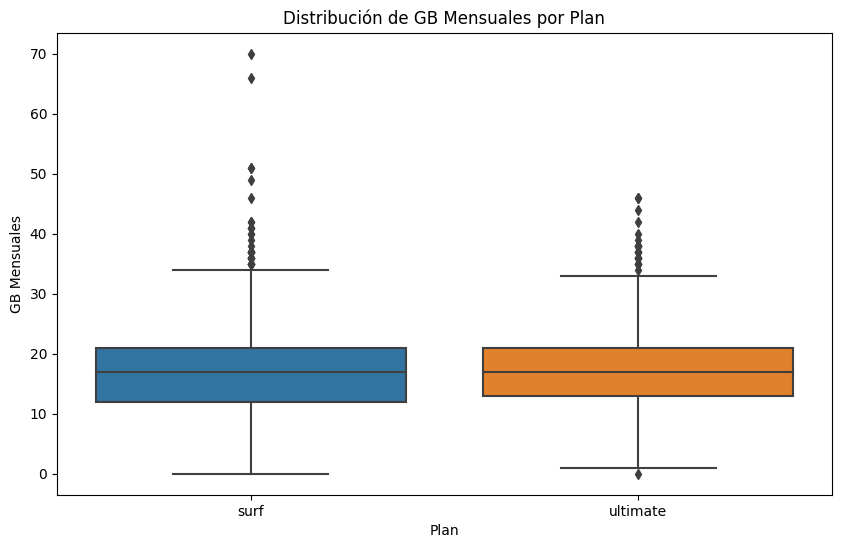

In [40]:
# Calcula la media y la varianza de la distribución de gb mensuales por plan

mean_internet = pivot_internet.mean()
var_internet = pivot_internet.var()
display(mean_internet)
display(var_internet)

# Traza un diagrama de caja para visualizar la distribución de gb mensuales por plan

plt.figure(figsize=(10, 6))
sns.boxplot(data=pivot_internet)
plt.title('Distribución de GB Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('GB Mensuales')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

De acuerdo a las comparaciones realizadas mediante los graficos:
1.Podemos observar que los usuarios se comportan de manera similar, ya que la mayoria consume entre 10 y 25 GB sin importar el plan que se tenga.
2.Los usuarios Surf tienen su consumo medio muy cerca de su limite, lo que significa que aproximadamente a la mitad no les es suficiente su plan y tienden a pagar gb extras.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,34.396667,70.000000
3,45.941304,74.666667
4,40.710600,73.000000
5,47.628182,70.724138
6,49.276289,71.638298
7,62.674050,71.898305
8,63.931173,72.859155
9,58.271495,72.034884


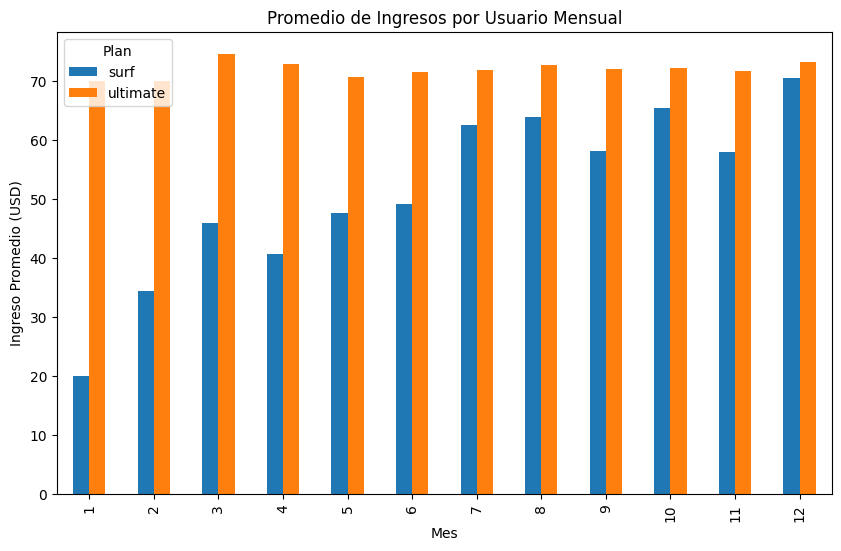

In [41]:
# Compara la cantidad de ingreso mensual generado por usuarios por plan

pivot_revenue_monthly = revenue.pivot_table(index='month', columns='plan', values='total_revenue')
display(pivot_revenue_monthly)

pivot_revenue_monthly.plot( kind = 'bar', figsize = (10,6))

plt.title('Promedio de Ingresos por Usuario Mensual')
plt.xlabel('Mes')
plt.ylabel('Ingreso Promedio (USD)')
plt.legend(title='Plan')

plan             surf  ultimate
user_id month                  
1000    12        NaN      70.0
1001    8       20.00       NaN
        9       20.00       NaN
        10      90.09       NaN
        11      60.00       NaN
...               ...       ...
1498    12     100.00       NaN
1499    9       20.00       NaN
        10      70.00       NaN
        11      40.00       NaN
        12      90.00       NaN

[2293 rows x 2 columns]

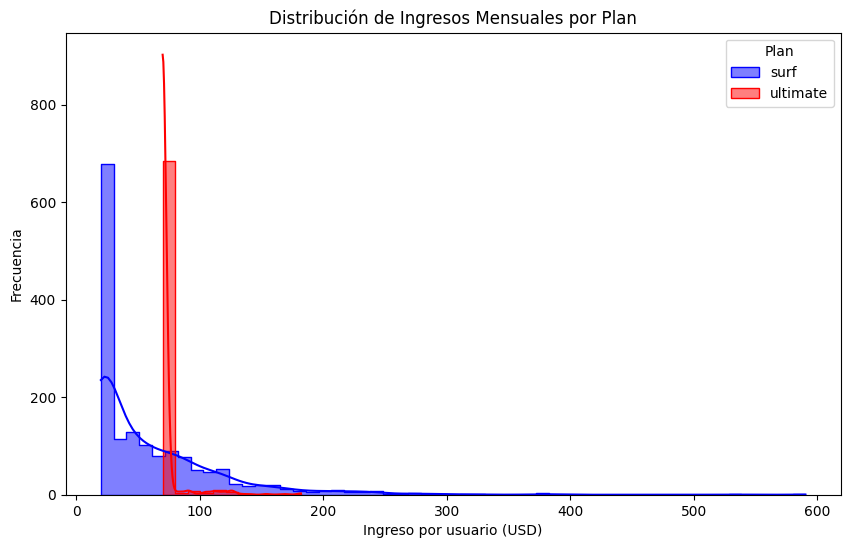

In [42]:
# Compara elingreso mensual que generan los usuarios de cada plan. Traza un histograma.

pivot_revenue = revenue.pivot_table(index=['user_id','month'], columns='plan', values='total_revenue', aggfunc='sum')
display(pivot_revenue)

# Grafico con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=pivot_revenue, x='surf', element='step', kde=True, color='blue', label='surf')
sns.histplot(data=pivot_revenue, x='ultimate', element ='step', kde=True, color='red', label='ultimate')

plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Ingreso por usuario (USD)')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

plan
surf        60.706408
ultimate    72.313889
dtype: float64

plan
surf        3067.835152
ultimate     129.848486
dtype: float64

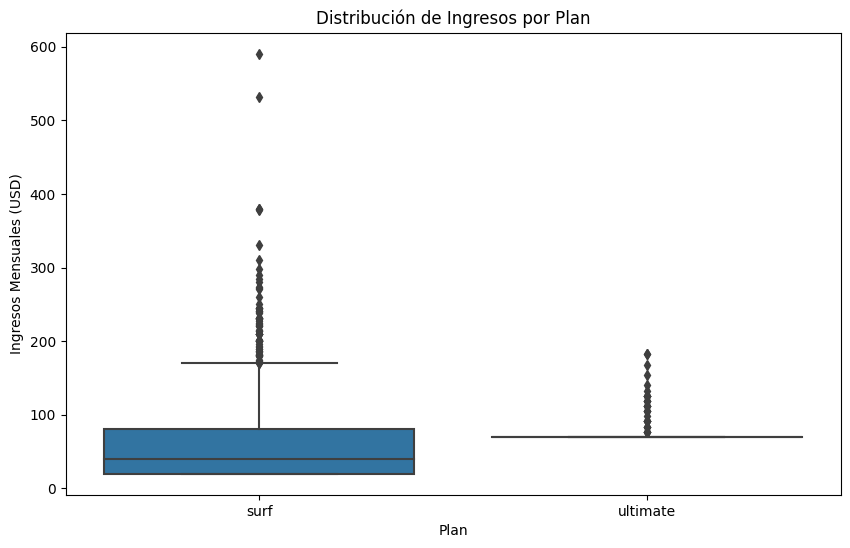

In [43]:
# Calcula la media y la varianza de la distribución ingresos por plan

mean_revenue = pivot_revenue.mean()
var_revenue = pivot_revenue.var()
display(mean_revenue)
display(var_revenue)

# Traza un diagrama de caja para visualizar la distribución de ingresos mensuales por plan

plt.figure(figsize=(10, 6))
sns.boxplot(data=pivot_revenue)
plt.title('Distribución de Ingresos por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales (USD)')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

* Se observa que la mayoria de los usuarios de Ultimate paga su cuota fija de 70 USD, mientras que los usuarios de Surf pagan un sobre precio. 


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

* H0 = Los ingresos promedio procedente de los usuarios Ultimate y Surf son iguales
* H1 = Los ingresos promedio procedente de los usuarios Ultimate y Surf son diferentes

In [44]:

# Filtro de datos por plan
revenue_surf = pivot_revenue['surf'].dropna()
revenue_ultimate = pivot_revenue['ultimate'].dropna()

# Comparación de varianzas
var_comparation = st.levene(revenue_surf,revenue_ultimate)
print(var_comparation)

LeveneResult(statistic=404.7301727752691, pvalue=5.028876110654919e-83)


In [45]:
# Prueba las hipótesis

results = st.ttest_ind(revenue_surf,revenue_ultimate, equal_var = False)

# Establecer el valor alfa
alpha = 0.05

print(f'Valor p: {results.pvalue}')

# Interpretación del resultado
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa en los ingresos promedio entre los planes.")

Valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

* H0 = Los ingresos promedio procedente de del área NY-NJ son iguales a los de los usuarios de otras regiones
* H1 = Los ingresos promedio procedente de del área NY-NJ son diferentes a los de los usuarios de otras regiones

In [46]:
# Filtro de los ingresos para NY-NJ y otras regiones
ny_nj_revenue = revenue[revenue['city'].str.contains('NY|NJ')]['total_revenue']
other_regions_revenue = revenue[~revenue['city'].str.contains('NY|NJ')]['total_revenue']

# Comparación de varianzas
var_comparation = st.levene(ny_nj_revenue,other_regions_revenue)
print(var_comparation)


LeveneResult(statistic=9.987157752156076, pvalue=0.0015969343433827883)


In [47]:
# Prueba las hipótesis

results = st.ttest_ind(ny_nj_revenue,other_regions_revenue, equal_var = False)

# Establecer el valor alfa
alpha = 0.05

print(f'Valor p: {results.pvalue}')

# Interpretación del resultado
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos de la región NY-NJ de las otras regiones.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa en los ingresos de la región NY-NJ de las otras regiones.")



Valor p: 0.10667494170371573
No rechazamos la hipótesis nula: No hay una diferencia significativa en los ingresos de la región NY-NJ de las otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


* La conclusión que podemos sacar es que los usuarios independientemente del plan tienden a tener un consumo muy similar.
* Las caracteristicas del plan Surf en algunos servicios tiende a ser insuficiente, por el contrario en las de Ultimate tienden a sobrar.
* Como observación final se podria sugerir la creación de un plan intermedio para que pueda suplir las necesidades basicas de la mayoria de los usuarios y así poder ser mas competitivos en el mercado de telefonia.